<a href="https://colab.research.google.com/github/xadicavadzade/advanced_house_prediction/blob/main/advanced_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
sample_submission = pd.read_csv('/content/sample_submission.csv')
test = pd.read_csv('/content/test.csv')
train= pd.read_csv('/content/train.csv')

In [ ]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


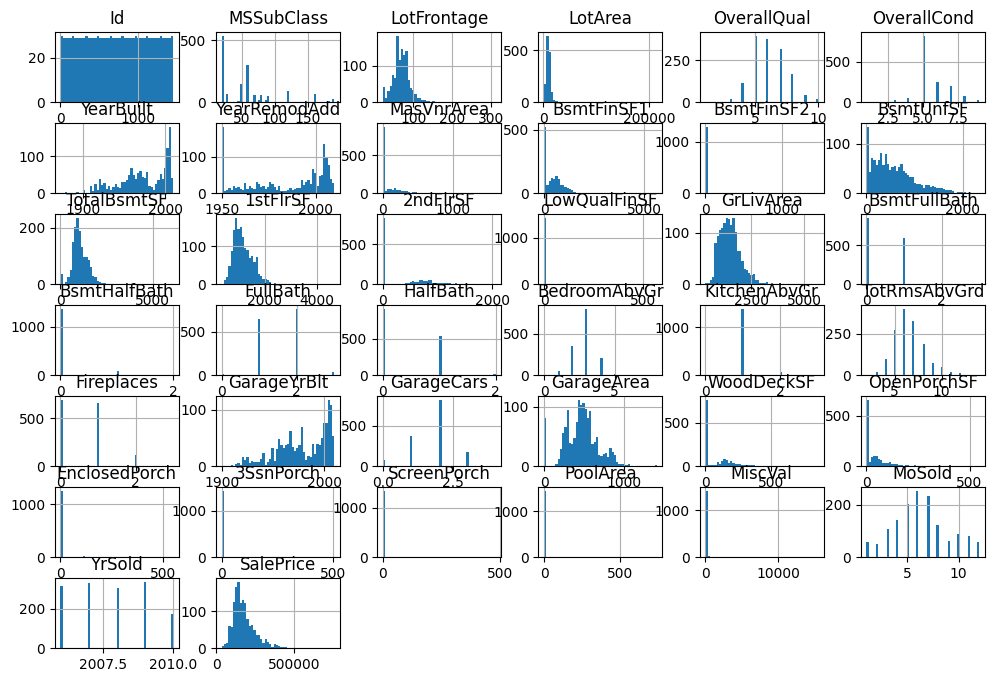

In [ ]:
 import matplotlib.pyplot as plt
 train.hist(bins=50, figsize=(12, 8))
 plt.show()

In [ ]:
# Select only numerical columns before calculating correlation
numerical_train = train.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
df = train.copy()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# ----------------------------
# 1. Feature Engineering Function (Provided by user)
# ----------------------------
def feature_engineering(df):
    # 1. Numerical Features
    df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
    df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
    # GarageAge için NaN değerleri kontrol edelim, çünkü GarageYrBlt eksik olabilir
    df["GarageAge"] = df["YrSold"] - df["GarageYrBlt"].fillna(df["YearBuilt"]) # Eğer GarageYrBlt yoksa YearBuilt kullan

    df["TotalBath"] = (df["FullBath"] + 0.5*df["HalfBath"] +
                       df["BsmtFullBath"] + 0.5*df["BsmtHalfBath"])

    df["TotalSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
    df["QualGrLiv"] = df["OverallQual"] * df["GrLivArea"]

    # 2. Categorical Encodings
    # Neighborhood median price (kaggle train data için)
    # Bu kısım dışarıda ele alınacak, bu fonksiyonda SalePrice'a erişim yok.
    # if "SalePrice" in df.columns:
    #     pass

    # Good lot flag (good condition + regular lot shape)
    df["GoodLot"] = ((df["Condition1"].isin(["PosN", "PosA"])) &
                     (df["LotShape"] == "Reg")).astype(int)

    # RL zoning flag
    df["IsRL"] = (df["MSZoning"] == "RL").astype(int)

    # 3. Interaction Features
    df["AgeQual"] = df["HouseAge"] * df["OverallQual"]
    df["GarageScore"] = df["GarageCars"] * df["GarageArea"]
    # Sıfıra bölme hatasını önlemek için
    df["BathPerRoom"] = df["TotalBath"] / df["TotRmsAbvGrd"].replace(0, np.nan)

    # 4. Binary Flags
    df["HasPool"] = (df["PoolArea"] > 0).astype(int)
    df["HasFireplace"] = (df["Fireplaces"] > 0).astype(int)
    df["HasBsmt"] = (df["TotalBsmtSF"] > 0).astype(int)
    df["HasGarage"] = (df["GarageArea"] > 0).astype(int)

    # 5. Log Transformations (only positive values)
    df["LogLotArea"] = np.log1p(df["LotArea"])
    df["LogTotalSF"] = np.log1p(df["TotalSF"])

    return df

# ----------------------------
# 2. Data Preprocessing and Feature Selection Pipeline
# ----------------------------

# neigh_price_map'i create_full_pipeline dışına taşıyacağız.
# Bu fonksiyon artık neigh_price_map'i bir argüman olarak alacak.
def create_full_pipeline(X_train_raw, neigh_price_map): # y_train_raw artık burada kullanılmıyor
    """
    Veri ön işleme, özellik mühendisliği ve özellik seçimi adımlarını içeren
    tam bir makine öğrenimi pipeline'ı oluşturur.
    """

    # 2.1. Eksik Değer Yönetimi ve Özel NA Durumları
    special_na_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                       'PoolQC', 'Fence', 'MiscFeature']

    for col in special_na_cols:
        if col in X_train_raw.columns:
            X_train_raw[col] = X_train_raw[col].fillna('None')

    numerical_impute_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2',
                             'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                             'GarageCars', 'GarageArea']

    for col in numerical_impute_cols:
        if col in X_train_raw.columns:
            X_train_raw[col] = X_train_raw[col].fillna(X_train_raw[col].median())

    categorical_impute_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                               'Electrical', 'KitchenQual', 'Functional', 'SaleType']

    for col in categorical_impute_cols:
        if col in X_train_raw.columns:
            X_train_raw[col] = X_train_raw[col].fillna(X_train_raw[col].mode()[0])

    # 2.2. Feature Engineering Uygulama
    X_train_fe = feature_engineering(X_train_raw.copy())

    # Neighborhood median price'ı X_train_fe'ye uygula
    X_train_fe["NeighPrice"] = X_train_fe["Neighborhood"].map(neigh_price_map)
    # Eğer eğitim setinde olmayan bir mahalle varsa (olmamalı ama önlem olarak)
    X_train_fe["NeighPrice"] = X_train_fe["NeighPrice"].fillna(neigh_price_map.get('median_overall', X_train_fe["NeighPrice"].median()))


    # SalePrice ve LogSalePrice sütunlarını çıkarın (eğer feature_engineering içinde kalmışlarsa)
    # feature_engineering fonksiyonundan SalePrice ve LogSalePrice'ı çıkardığımız için bu kontrol artık gereksiz.
    # Ancak, genel bir güvenlik önlemi olarak bırakılabilir.
    if "SalePrice" in X_train_fe.columns:
        X_train_fe = X_train_fe.drop("SalePrice", axis=1)
    if "LogSalePrice" in X_train_fe.columns:
        X_train_fe = X_train_fe.drop("LogSalePrice", axis=1)

    # 2.3. Özellik Tiplerini Güncelleme (Feature Engineering sonrası)
    numerical_cols = X_train_fe.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = X_train_fe.select_dtypes(include='object').columns.tolist()

    # Sıralı kategorik özellikler için manuel eşleme (Ordinal Encoding)
    ordinal_mapping = {
        'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,
        'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,
        'Av': 3, 'Mn': 2, 'No': 1,
        'Fin': 3, 'RFn': 2, 'Unf': 1,
        'Y': 1, 'N': 0, 'P': 0.5, # PavedDrive için
        'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1
    }

    ordinal_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                        'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'PavedDrive']

    for col in ordinal_features:
        if col in X_train_fe.columns:
            X_train_fe[col] = X_train_fe[col].map(ordinal_mapping).fillna(0)
            if col not in numerical_cols:
                numerical_cols.append(col)
            if col in categorical_cols:
                categorical_cols.remove(col)

    numerical_cols = X_train_fe.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = X_train_fe.select_dtypes(include='object').columns.tolist()

    # 2.4. Preprocessing Pipeline (Sayısal Ölçeklendirme, Kategorik One-Hot Encoding)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough'
    )

    # 2.5. Özellik Seçimi (Embedded Method - SelectFromModel ile RandomForest)
    # Feature selection using RandomForestRegressor as before
    feature_selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42),
                                       threshold='median')

    # 2.6. Model Pipeline
    # Changed regressor to XGBoostRegressor
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('feature_selection', feature_selector),
                                     ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))])

    return model_pipeline

# ----------------------------
# Usage Example
# ----------------------------

if __name__ == "__main__":
    # Veri Yükleme
    try:
        df = pd.read_csv("train.csv")
    except FileNotFoundError:
        print("train.csv dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
        exit()

    # Neighborhood median price'ı hesapla (df üzerinde, SalePrice varken)
    neigh_price_mapping = df.groupby("Neighborhood")["SalePrice"].median().to_dict()
    # Test setinde bilinmeyen mahalleler için bir varsayılan değer sağlamak üzere genel medyanı da saklayabiliriz.
    neigh_price_mapping['median_overall'] = df["SalePrice"].median()


    # Hedef değişkeni ayırma ve log dönüşümü
    X = df.drop('SalePrice', axis=1)
    y = np.log1p(df['SalePrice']) # Hedef değişkeni log dönüştür

    # Eğitim ve Test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Pipeline oluşturma ve eğitme
    # create_full_pipeline fonksiyonuna artık neigh_price_mapping'i gönderiyoruz.
    full_pipeline = create_full_pipeline(X_train.copy(), neigh_price_mapping)

    # X_train ve X_test üzerinde eksik değerleri ve özel NA'ları doldurma
    special_na_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                       'PoolQC', 'Fence', 'MiscFeature']
    for col in special_na_cols:
        if col in X_train.columns:
            X_train[col] = X_train[col].fillna('None')
            X_test[col] = X_test[col].fillna('None')

    numerical_impute_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2',
                             'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                             'GarageCars', 'GarageArea']
    for col in numerical_impute_cols:
        if col in X_train.columns:
            X_train[col] = X_train[col].fillna(X_train[col].median())
            X_test[col] = X_test[col].fillna(X_train[col].median()) # Test için eğitim medyanı kullan

    categorical_impute_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                               'Electrical', 'KitchenQual', 'Functional', 'SaleType']
    for col in categorical_impute_cols:
        if col in X_train.columns:
            X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
            X_test[col] = X_test[col].fillna(X_train[col].mode()[0]) # Test için eğitim modu kullan

    # Feature Engineering'i X_train ve X_test üzerinde uygula
    X_train_processed = feature_engineering(X_train.copy())
    X_test_processed = feature_engineering(X_test.copy())

    # Neighborhood median price'ı X_train_processed ve X_test_processed'a uygula
    X_train_processed["NeighPrice"] = X_train_processed["Neighborhood"].map(neigh_price_mapping)
    X_test_processed["NeighPrice"] = X_test_processed["Neighborhood"].map(neigh_price_mapping).fillna(neigh_price_mapping['median_overall'])

    # SalePrice ve LogSalePrice sütunlarını çıkarın (feature_engineering'den çıkarıldığı için bu satırlar artık gereksiz ama güvenlik için bırakılabilir)
    if "SalePrice" in X_train_processed.columns:
        X_train_processed = X_train_processed.drop("SalePrice", axis=1)
    if "LogSalePrice" in X_train_processed.columns:
        X_train_processed = X_train_processed.drop("LogSalePrice", axis=1)
    if "SalePrice" in X_test_processed.columns:
        X_test_processed = X_test_processed.drop("SalePrice", axis=1)
    if "LogSalePrice" in X_test_processed.columns:
        X_test_processed = X_test_processed.drop("LogSalePrice", axis=1)

    # Sıralı kategorik özellikleri manuel olarak dönüştür (pipeline'dan önce)
    ordinal_mapping = {
        'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,
        'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,
        'Av': 3, 'Mn': 2, 'No': 1,
        'Fin': 3, 'RFn': 2, 'Unf': 1,
        'Y': 1, 'N': 0, 'P': 0.5, # PavedDrive için
        'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1
    }
    ordinal_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                        'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'PavedDrive']

    for col in ordinal_features:
        if col in X_train_processed.columns:
            X_train_processed[col] = X_train_processed[col].map(ordinal_mapping).fillna(0)
            X_test_processed[col] = X_test_processed[col].map(ordinal_mapping).fillna(0)

    # Pipeline'ı eğit
    full_pipeline.fit(X_train_processed, y_train)

    # Tahmin yap
    y_pred = full_pipeline.predict(X_test_processed)

    # Performansı değerlendir (RMSE ve R-squared)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model RMSE: {rmse:.4f}")
    print(f"Model R-squared: {r2:.4f}")

Model RMSE: 0.1495
Model R-squared: 0.8802


In [ ]:
# ----------------------------
# 1. Test datasını yüklə
# ----------------------------
test_df = pd.read_csv("test.csv")

# ----------------------------
# 2. Train-dəki kimi preprocessing
# ----------------------------

# Special NA doldurma
special_na_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                   'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                   'PoolQC', 'Fence', 'MiscFeature']
for col in special_na_cols:
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna("None")

# Numeric imputation
numerical_impute_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2',
                         'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                         'GarageCars', 'GarageArea']
for col in numerical_impute_cols:
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(X_train[col].median())  # train median

# Categorical imputation
categorical_impute_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                           'Electrical', 'KitchenQual', 'Functional', 'SaleType']
for col in categorical_impute_cols:
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(X_train[col].mode()[0])  # train mode

# ----------------------------
# 3. Feature Engineering
# ----------------------------
test_processed = feature_engineering(test_df.copy())

# Neighborhood median qiyməti əlavə et
test_processed["NeighPrice"] = test_processed["Neighborhood"].map(neigh_price_mapping)
test_processed["NeighPrice"] = test_processed["NeighPrice"].fillna(neigh_price_mapping["median_overall"])

# Ordinal mapping (train-dəki kimi)
for col in ordinal_features:
    if col in test_processed.columns:
        test_processed[col] = test_processed[col].map(ordinal_mapping).fillna(0)

# ----------------------------
# 4. Prediction
# ----------------------------
preds_log = full_pipeline.predict(test_processed)

# Çünki train-də target log1p(SalePrice) idi → indi inverse transform etmək lazımdır
preds = np.expm1(preds_log)

# ----------------------------
# 5. Submission faylı
# ----------------------------
submission = pd.DataFrame({
    "Id": test_df["Id"],        # test.csv-dəki Id sütunu
    "SalePrice": preds
})

submission.to_csv("submission.csv", index=False)
print("submission.csv faylı yaradıldı ✅")


submission.csv faylı yaradıldı ✅


In [ ]:
submission

,Id,SalePrice
0,1461,119657.343072
1,1462,152307.344008
2,1463,178116.476075
3,1464,184580.662847
4,1465,197906.709450
...,...,...
1454,2915,94370.186500
1455,2916,93214.730143
1456,2917,155370.262913
1457,2918,123744.771622


In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# ---------------- Data Preprocessing ----------------
df_train = pd.read_csv("/content/train.csv")
df_test  = pd.read_csv("/content/test.csv")

df_train.drop(columns=['Id'], inplace=True)
test_ids = df_test['Id']

X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

combined_data = pd.concat([X, df_test.drop('Id', axis=1)], axis=0)

# Fill missing values
numerical_cols_combined = combined_data.select_dtypes(include=np.number).columns
for col in numerical_cols_combined:
    combined_data[col] = combined_data[col].fillna(combined_data[col].median())

categorical_cols_combined = combined_data.select_dtypes(include=object).columns
for col in categorical_cols_combined:
    combined_data[col] = combined_data[col].fillna(combined_data[col].mode()[0])

# Feature engineering
combined_data['TotalSF'] = combined_data['TotalBsmtSF'] + combined_data['1stFlrSF'] + combined_data['2ndFlrSF']

# Encoding strategy
categorical_cols_final = combined_data.select_dtypes(include=['object', 'category']).columns
encoded_data = combined_data.copy()

for col in categorical_cols_final:
    unique_count = combined_data[col].nunique()
    if unique_count < 6:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_col_data = encoder.fit_transform(combined_data[[col]])
        new_cols = [f"{col}{category}" for category in encoder.categories[0]]
        encoded_col_df = pd.DataFrame(encoded_col_data, columns=new_cols, index=combined_data.index)
        encoded_data = pd.concat([encoded_data.drop(col, axis=1), encoded_col_df], axis=1)
    elif 6 <= unique_count <= 15:
        encoder = LabelEncoder()
        encoded_data[col] = encoder.fit_transform(combined_data[col].astype(str))
    else:
        freq_map = combined_data[col].value_counts().to_dict()
        encoded_data[col] = combined_data[col].map(freq_map)

X_encoded = encoded_data.iloc[:len(X)]
df_test_encoded = encoded_data.iloc[len(X):]

# ---------------- Train/Validation Split ----------------
X_train_encoded, X_val_encoded, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# ---------------- Stacking Regressor ----------------
base_models = [
    ("rf", RandomForestRegressor(n_estimators=300, random_state=42)),
    ("gb", GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=42)),
    ("lgbm", LGBMRegressor(
        n_estimators=1500, learning_rate=0.03, max_depth=-1,
        num_leaves=31, subsample=0.8, colsample_bytree=0.8,
        random_state=42, n_jobs=-1
    ))
]

# Meta-model (final layer)
meta_model = Ridge(alpha=1.0)

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1,
    passthrough=False
)

# Train stacking model
stacking_model.fit(X_train_encoded, y_train)

# ---------------- Validation Metrics ----------------
y_pred_val = stacking_model.predict(X_val_encoded)
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2  = r2_score(y_val, y_pred_val)

print("Stacking Regressor Validation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# ---------------- Final Test Predictions ----------------
y_pred_test = stacking_model.predict(df_test_encoded)

submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": y_pred_test
})
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# 1. Feature Engineering Function
# ----------------------------
def feature_engineering(df):
    """
    Comprehensive feature engineering function
    """
    # 1. Numerical Features
    df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
    df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
    # GarageAge with NaN handling
    df["GarageAge"] = df["YrSold"] - df["GarageYrBlt"].fillna(df["YearBuilt"])

    df["TotalBath"] = (df["FullBath"] + 0.5*df["HalfBath"] +
                       df["BsmtFullBath"] + 0.5*df["BsmtHalfBath"])

    df["TotalSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
    df["QualGrLiv"] = df["OverallQual"] * df["GrLivArea"]

    # 2. Categorical Encodings
    # Good lot flag (good condition + regular lot shape)
    df["GoodLot"] = ((df["Condition1"].isin(["PosN", "PosA"])) &
                     (df["LotShape"] == "Reg")).astype(int)

    # RL zoning flag
    df["IsRL"] = (df["MSZoning"] == "RL").astype(int)

    # 3. Interaction Features
    df["AgeQual"] = df["HouseAge"] * df["OverallQual"]
    df["GarageScore"] = df["GarageCars"] * df["GarageArea"]
    # Prevent division by zero
    df["BathPerRoom"] = df["TotalBath"] / df["TotRmsAbvGrd"].replace(0, np.nan)

    # 4. Binary Flags
    df["HasPool"] = (df["PoolArea"] > 0).astype(int)
    df["HasFireplace"] = (df["Fireplaces"] > 0).astype(int)
    df["HasBsmt"] = (df["TotalBsmtSF"] > 0).astype(int)
    df["HasGarage"] = (df["GarageArea"] > 0).astype(int)

    # 5. Log Transformations (only positive values)
    df["LogLotArea"] = np.log1p(df["LotArea"])
    df["LogTotalSF"] = np.log1p(df["TotalSF"])

    # 6. Additional engineered features for better performance
    df["PorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]
    df["TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
    df["LivLotRatio"] = df["GrLivArea"] / df["LotArea"]
    df["Spaciousness"] = (df["1stFlrSF"] + df["2ndFlrSF"]) / df["TotRmsAbvGrd"].replace(0, 1)

    return df

# ----------------------------
# 2. Data Preprocessing Functions
# ----------------------------
def preprocess_data(df, is_train=True, train_stats=None):
    """
    Handle missing values and special NA cases
    """
    df_processed = df.copy()

    # Special NA columns (missing values have meaning)
    special_na_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                       'PoolQC', 'Fence', 'MiscFeature']

    for col in special_na_cols:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].fillna('None')

    # Numerical imputation columns
    numerical_impute_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2',
                             'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                             'GarageCars', 'GarageArea']

    if is_train:
        train_medians = {}
        for col in numerical_impute_cols:
            if col in df_processed.columns:
                median_val = df_processed[col].median()
                train_medians[col] = median_val
                df_processed[col] = df_processed[col].fillna(median_val)
        train_stats = {'medians': train_medians}
    else:
        for col in numerical_impute_cols:
            if col in df_processed.columns and col in train_stats['medians']:
                df_processed[col] = df_processed[col].fillna(train_stats['medians'][col])

    # Categorical imputation columns
    categorical_impute_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                               'Electrical', 'KitchenQual', 'Functional', 'SaleType']

    if is_train:
        train_modes = {}
        for col in categorical_impute_cols:
            if col in df_processed.columns:
                mode_val = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
                train_modes[col] = mode_val
                df_processed[col] = df_processed[col].fillna(mode_val)
        if train_stats is None:
            train_stats = {}
        train_stats['modes'] = train_modes
    else:
        for col in categorical_impute_cols:
            if col in df_processed.columns and 'modes' in train_stats and col in train_stats['modes']:
                df_processed[col] = df_processed[col].fillna(train_stats['modes'][col])

    return df_processed, train_stats

def apply_ordinal_encoding(df):
    """
    Apply ordinal encoding to categorical features with inherent order
    """
    df_encoded = df.copy()

    # Ordinal mapping
    ordinal_mapping = {
        'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,
        'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,
        'Av': 3, 'Mn': 2, 'No': 1,
        'Fin': 3, 'RFn': 2, 'Unf': 1,
        'Y': 1, 'N': 0, 'P': 0.5,  # PavedDrive
        'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1
    }

    ordinal_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                        'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'PavedDrive']

    for col in ordinal_features:
        if col in df_encoded.columns:
            df_encoded[col] = df_encoded[col].map(ordinal_mapping).fillna(0)

    return df_encoded

# ----------------------------
# 3. Stacking Ensemble Pipeline
# ----------------------------
def create_stacking_pipeline(neigh_price_map):
    """
    Create a stacking ensemble pipeline with multiple base models
    """

    # Define base models with optimized parameters
    base_models = [
        ("rf", RandomForestRegressor(
            n_estimators=300,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        )),
        ("gb", GradientBoostingRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=4,
            min_samples_split=5,
            min_samples_leaf=3,
            random_state=42
        )),
        ("lgbm", LGBMRegressor(
            n_estimators=1500,
            learning_rate=0.03,
            max_depth=-1,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1,
            verbose=-1
        )),
        ("xgb", XGBRegressor(
            n_estimators=1000,
            learning_rate=0.05,
            max_depth=4,
            min_child_weight=1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1
        ))
    ]

    # Meta-learner (final estimator)
    meta_learner = Ridge(alpha=10.0)

    # Create stacking regressor
    stacking_regressor = StackingRegressor(
        estimators=base_models,
        final_estimator=meta_learner,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )

    return stacking_regressor

# ----------------------------
# 4. Full Pipeline Creation
# ----------------------------
def create_full_pipeline(X_train_raw, neigh_price_map):
    """
    Create the complete preprocessing and modeling pipeline
    """

    # Preprocessing
    X_train_processed, train_stats = preprocess_data(X_train_raw, is_train=True)
    X_train_fe = feature_engineering(X_train_processed)

    # Add neighborhood price feature
    X_train_fe["NeighPrice"] = X_train_fe["Neighborhood"].map(neigh_price_map)
    X_train_fe["NeighPrice"] = X_train_fe["NeighPrice"].fillna(
        neigh_price_map.get('median_overall', X_train_fe["NeighPrice"].median())
    )

    # Apply ordinal encoding
    X_train_encoded = apply_ordinal_encoding(X_train_fe)

    # Remove target columns if present
    target_cols = ["SalePrice", "LogSalePrice"]
    for col in target_cols:
        if col in X_train_encoded.columns:
            X_train_encoded = X_train_encoded.drop(col, axis=1)

    # Identify feature types
    numerical_cols = X_train_encoded.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = X_train_encoded.select_dtypes(include='object').columns.tolist()

    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
        ],
        remainder='passthrough'
    )

    # Feature selection
    feature_selector = SelectFromModel(
        RandomForestRegressor(n_estimators=100, random_state=42),
        threshold='median'
    )

    # Create stacking model
    stacking_model = create_stacking_pipeline(neigh_price_map)

    # Complete pipeline
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selector),
        ('stacking_regressor', stacking_model)
    ])

    return full_pipeline, train_stats

# ----------------------------
# 5. Main Execution
# ----------------------------
def main():
    """
    Main function to train model and generate predictions
    """
    print("🚀 Starting House Price Prediction with Stacking Ensemble...")

    # Load training data
    try:
        df = pd.read_csv("train.csv")
        print(f"✅ Training data loaded: {df.shape}")
    except FileNotFoundError:
        print("❌ train.csv file not found. Please check the file path.")
        return

    # Calculate neighborhood median prices
    neigh_price_mapping = df.groupby("Neighborhood")["SalePrice"].median().to_dict()
    neigh_price_mapping['median_overall'] = df["SalePrice"].median()
    print(f"✅ Neighborhood price mapping created for {len(neigh_price_mapping)-1} neighborhoods")

    # Separate features and target
    X = df.drop('SalePrice', axis=1)
    y = np.log1p(df['SalePrice'])  # Log transform target

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print(f"✅ Data split - Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

    # Create and train pipeline
    print("🔄 Creating and training stacking ensemble pipeline...")
    full_pipeline, train_stats = create_full_pipeline(X_train.copy(), neigh_price_mapping)

    # Process training data
    X_train_processed, _ = preprocess_data(X_train, is_train=True, train_stats=train_stats)
    X_train_fe = feature_engineering(X_train_processed)
    X_train_fe["NeighPrice"] = X_train_fe["Neighborhood"].map(neigh_price_mapping)
    X_train_fe["NeighPrice"] = X_train_fe["NeighPrice"].fillna(neigh_price_mapping['median_overall'])
    X_train_final = apply_ordinal_encoding(X_train_fe)

    # Process test data
    X_test_processed, _ = preprocess_data(X_test, is_train=False, train_stats=train_stats)
    X_test_fe = feature_engineering(X_test_processed)
    X_test_fe["NeighPrice"] = X_test_fe["Neighborhood"].map(neigh_price_mapping)
    X_test_fe["NeighPrice"] = X_test_fe["NeighPrice"].fillna(neigh_price_mapping['median_overall'])
    X_test_final = apply_ordinal_encoding(X_test_fe)

    # Train the model
    full_pipeline.fit(X_train_final, y_train)
    print("✅ Model training completed!")

    # Make predictions
    y_pred = full_pipeline.predict(X_test_final)

    # Evaluate performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"📊 Model Performance:")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   R-squared: {r2:.4f}")

    # Load test data and generate submission
    try:
        test_df = pd.read_csv("test.csv")
        print(f"✅ Test data loaded: {test_df.shape}")

        # Process test data
        test_processed, _ = preprocess_data(test_df, is_train=False, train_stats=train_stats)
        test_fe = feature_engineering(test_processed)
        test_fe["NeighPrice"] = test_fe["Neighborhood"].map(neigh_price_mapping)
        test_fe["NeighPrice"] = test_fe["NeighPrice"].fillna(neigh_price_mapping["median_overall"])
        test_final = apply_ordinal_encoding(test_fe)

        # Generate predictions
        preds_log = full_pipeline.predict(test_final)
        preds = np.expm1(preds_log)  # Inverse log transform

        # Create submission file
        submission = pd.DataFrame({
            "Id": test_df["Id"],
            "SalePrice": preds
        })
        submission.to_csv("submission.csv", index=False)
        print("✅ submission.csv file created successfully!")
        print(f"📈 Prediction range: ${preds.min():.0f} - ${preds.max():.0f}")

    except FileNotFoundError:
        print("⚠️  test.csv not found. Skipping submission file creation.")

    return full_pipeline, train_stats, neigh_price_mapping

# ----------------------------
# 6. Run the complete pipeline
# ----------------------------
if __name__ == "__main__":
    pipeline, stats, mapping = main()

🚀 Starting House Price Prediction with Stacking Ensemble...
✅ Training data loaded: (1460, 81)
✅ Neighborhood price mapping created for 25 neighborhoods
✅ Data split - Train: 1168, Test: 292
🔄 Creating and training stacking ensemble pipeline...
✅ Model training completed!
📊 Model Performance:
   RMSE: 0.1366
   R-squared: 0.9001
✅ Test data loaded: (1459, 80)
✅ submission.csv file created successfully!
📈 Prediction range: $48243 - $535105
